##############

Problem 3c

##########

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import eig

In [2]:
##define dimensionless system
def switch(y,t,gamma,n=2):
    dadt = gamma/(1+y[1]**n) - y[0]
    dbdt = gamma/(1+y[0]**n) - y[1]
    return [dadt, dbdt] 

#define jacobian
def switch_jac(y,t,gamma,n=2):
    a = y[0]
    b = y[1]
    dada = -1
    dadb = -gamma * n * b**(n-1)/((1+b**n)**2)
    dbda = -gamma * n * a**(n-1)/((1+a**n)**2)
    dbdb = -1
    return np.array([[dada,dadb],[dbda,dbdb]])





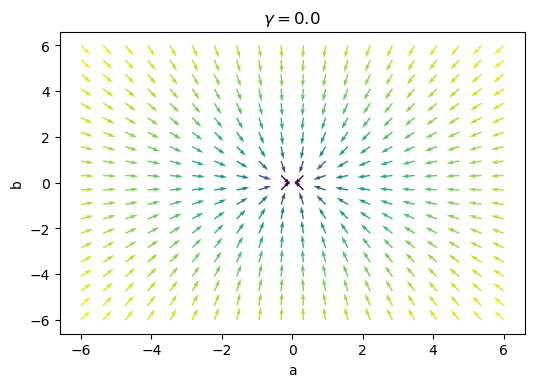

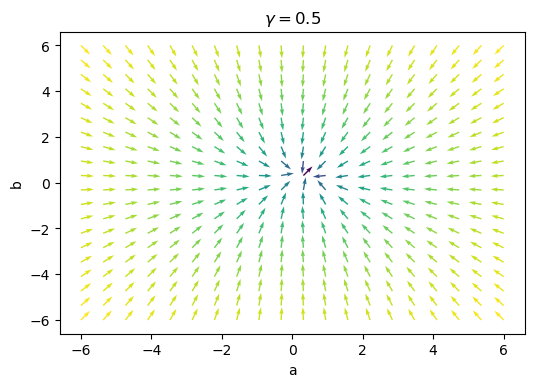

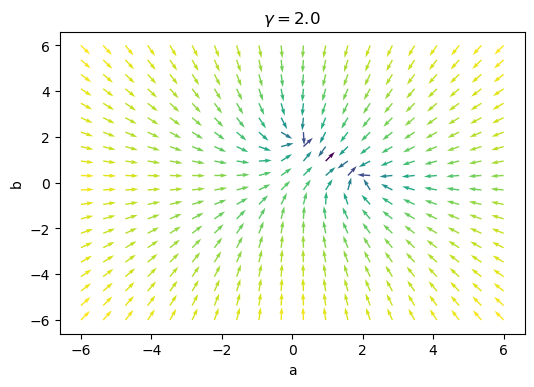

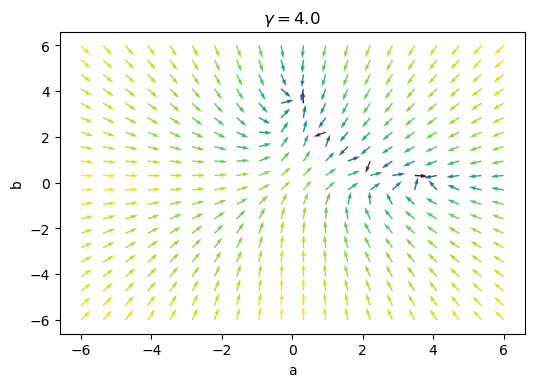

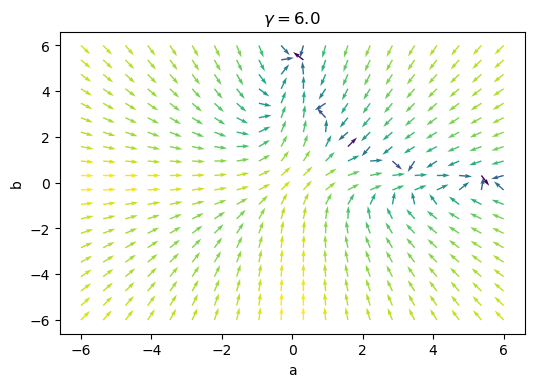

In [3]:
samples = 20

#set a,b ranges
a = np.linspace(-6, 6, samples)
b = np.linspace( -6, 6, samples)
A,B = np.meshgrid(a, b)
gammas = np.array([0,0.5,2,4,6])


for gamma in gammas:
    plt.figure(dpi=100)
    DA,DB = switch([A,B], 0, gamma)
    nrm = np.sqrt(DA**2 + DB**2)
    plt.quiver(A, B, DA/nrm, DB/nrm, np.log(nrm))
    plt.title("$\gamma={}$".format(gamma))
    plt.xlabel("a")
    plt.ylabel("b")

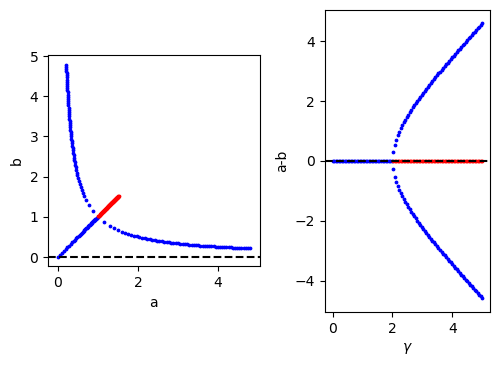

In [4]:
# Create two plots side by side. ax is a list of axes
fig, ax = plt.subplots(1,2,dpi=100)



# We use (root_samples)^2 sample points as initial conditions for the root finder
root_samples = 4

# Generate a mesh of initial conditions in phase space
a = np.linspace(-3, 3, root_samples)
b = np.linspace( -3, 3, root_samples)
A,B = np.meshgrid(a, b)

# Iterate through phase space. No need for vectorization, the root finder does the hard work
#gamma should be positive as alpha,beta and K are
for gamma in np.linspace(0,5,100):
    
    # Here we collect our stable and unstable roots
    stable_roots = []
    unstbl_roots = []

    # Iterate through our sample mesh
    for a_current,b_current in np.nditer([A,B]):
        
        # Use current sample point and search for a solution
        sol = root(switch, [a_current,b_current], jac = switch_jac, args=(0,gamma))
        
        if sol.success:
            
            # Calculate jacobian at root and calculate stability
            jac = switch_jac(sol.x, 0, gamma)
            eigval, _ = eig(jac)
            stable = all(np.real(eigval) < 0)
            
            if stable:
                stable_roots.append(sol.x)
            else:
                unstbl_roots.append(sol.x)
    
    # Check if roots have been found
    if stable_roots:
        
        # We determine "unique" roots to speed up drawing
        #
        # vstack -> concatenate all roots (2d vectors) into an array
        # around -> round to 6 decimal places
        # unique -> return only unique vectors (along axis=0)
        
        stable_roots = np.unique(np.around(np.vstack(stable_roots), 6), axis=0)
        ax[0].scatter(*stable_roots.T, c='b', s=3)
        
        ## compute a-b
        m = np.zeros_like(stable_roots)
        m[:,0] = gamma
        m[:,1] = stable_roots[:,1] - stable_roots[:,0]
     

        ax[1].scatter(*m.T, c='b', s=3)
        
    if unstbl_roots:
        unstbl_roots = np.unique(np.around(np.vstack(unstbl_roots), 4), axis=0)
        ax[0].scatter(*unstbl_roots.T, c='r', s=3)
        
        m = np.zeros_like(unstbl_roots)
        m[:,0] = gamma
        m[:,1] = unstbl_roots[:,1] - unstbl_roots[:,0]
        
        unstbl_roots[:,0] = gamma
        ax[1].scatter(*m.T, c='r', s=3)


# Some cosmetics
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_ylabel("b")
ax[0].set_xlabel("a")
ax[1].set_xlabel(r"$\gamma$")
ax[1].set_ylabel("a-b")
ax[0].axhline(y=0, linestyle='--', color='k')
ax[1].axhline(y=0, linestyle='--', color='k')


